all, 0.396145


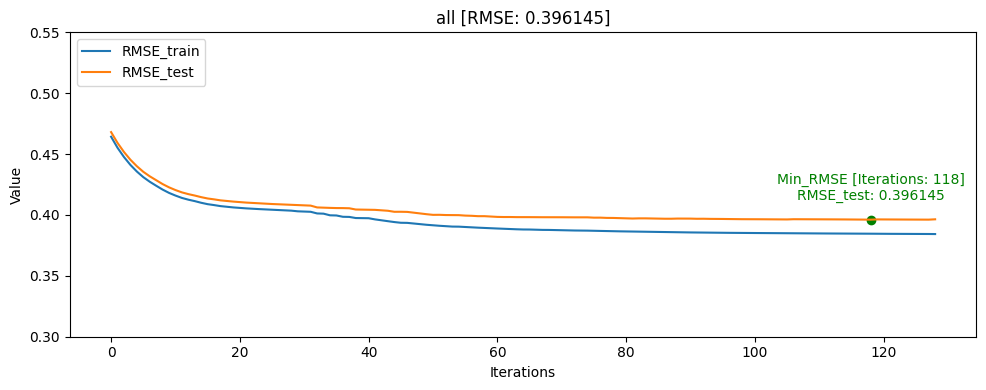

head, 0.393213


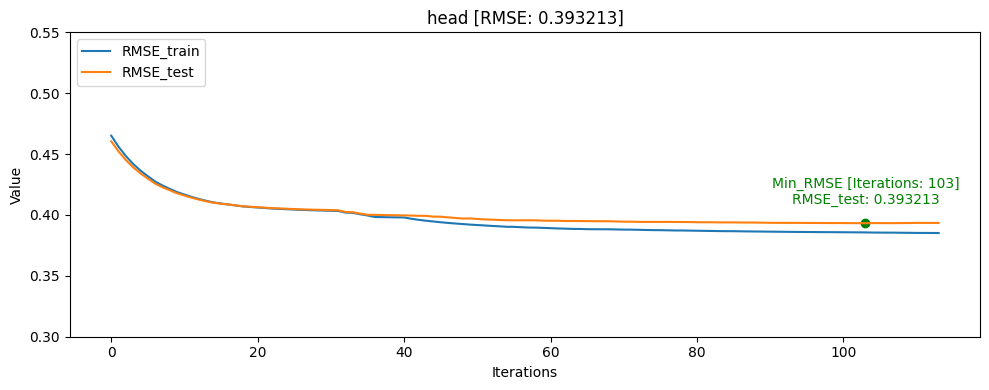

head_one, 0.361193


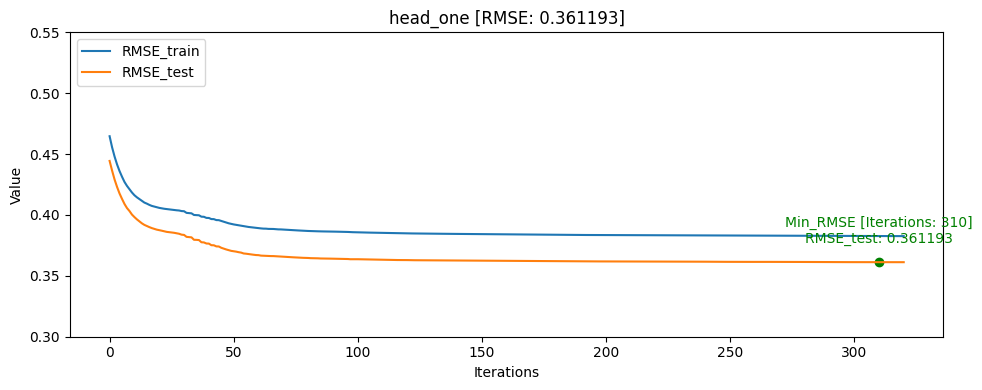

head_tail_group_one, 0.437356


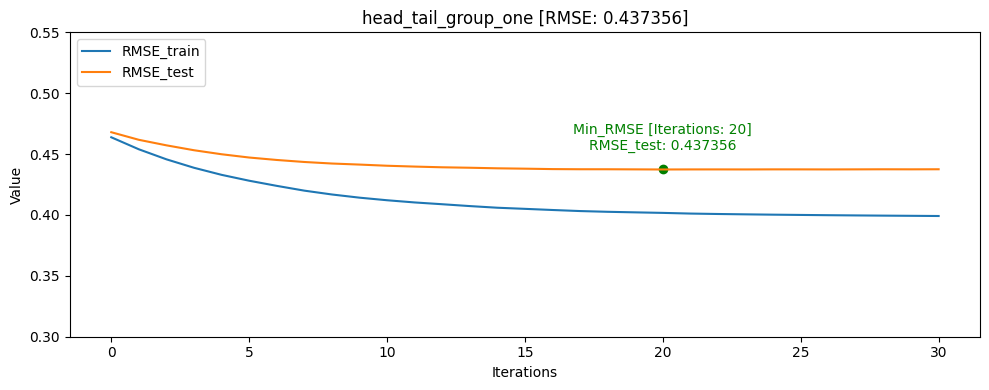

head_tail_one, 0.391693


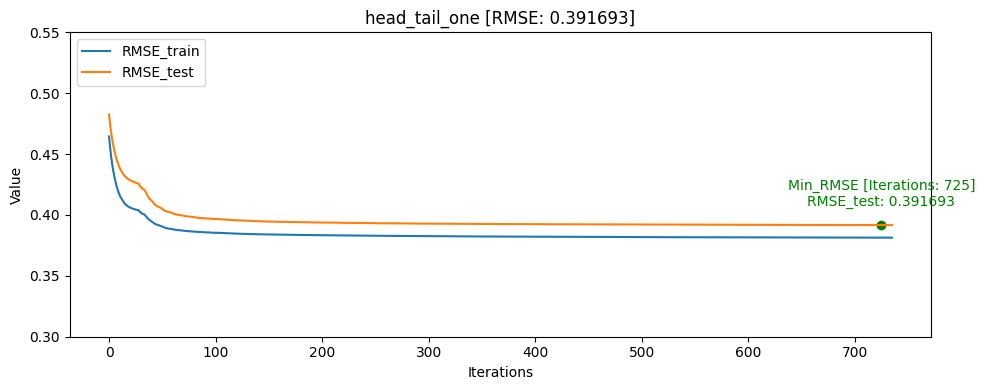

tail, 0.400726


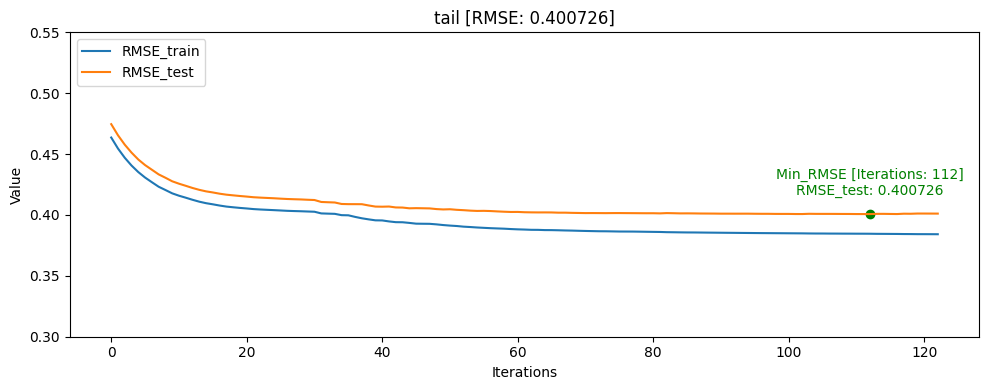

tail_one, 0.421282


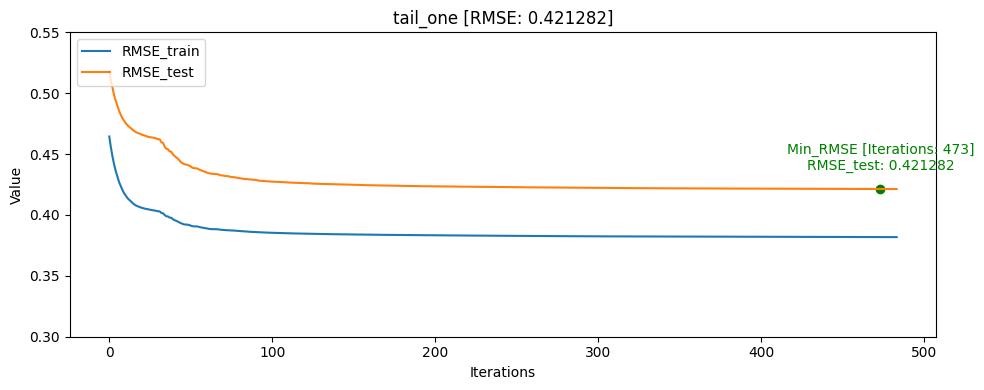

In [12]:
import os
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def show_plot(title: str, dataframe: pd.DataFrame):
    # 그래프 크기 설정
    plt.figure(figsize=(10, 4))
    # 그래프 그리기
    plt.plot(df.index, df['RMSE_train'], label='RMSE_train')
    plt.plot(df.index, df['RMSE_test'], label='RMSE_test')
    # y축 범위 설정
    plt.ylim(0.3, 0.55)
    # 최대값과 최소값 지점 찾기
    min_idx = np.argmin(df['RMSE_test'])
    # 최대값과 최소값 표시
    plt.scatter(min_idx, df.loc[min_idx, 'RMSE_test'], color='green')
    # 최대값과 최소값의 수치와 인덱스 표시
    plt.text(min_idx, df.loc[min_idx, 'RMSE_test'], f"Min_RMSE [Iterations: {min_idx}]\nRMSE_test: {df.loc[min_idx, 'RMSE_test']:.6f}\n",
            ha='center', va='bottom', color='green')
    # 그래프 제목 설정
    plt.title(f"{title} [RMSE: {df.loc[min_idx, 'RMSE_test']:.6f}]")
    # 그래프 레이블 설정
    plt.xlabel('Iterations')
    plt.ylabel('Value')
    # 범례 표시
    plt.legend(loc='upper left')
    # 그래프 출력
    plt.tight_layout()
    plt.show()

# ---------- code ---------- #
folder_path = '../ML_models/log/catboost_regressor/'  # 폴더 경로
# 폴더 내의 파일 목록 가져오기
file_list = os.listdir(folder_path)

result_dict = dict()
for file_name in file_list:
    path = folder_path+file_name+'/catboost_training.json'
    # JSON 파일 열기
    with open(path, 'r') as f:
        json_data = json.load(f)
        result_dict[file_name] = json_data['iterations']

for key in sorted(result_dict.keys()):
    df = pd.DataFrame(result_dict[key])
    df['RMSE_train'] = df['learn'].apply(lambda x: x[0])
    df['RMSE_test'] = df['test'].apply(lambda x: x[0])
    
    print(f"{key}, {min(df['RMSE_test']):.6f}")
    show_plot(key, df)